## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
%matplotlib inline

In [76]:
boston = datasets.load_boston()

### Ridge

In [53]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

alpha_list=[0.001,0.01,0.1,1,5]
for alpha_ in alpha_list:
    ridge = linear_model.Ridge(alpha=alpha_)
    ridge.fit(x_train, y_train)
    y_pred_ = ridge.predict(x_test)
    print(f"Mean squared error (alpha={alpha_}): {mean_squared_error(y_test, y_pred_)}")

Mean squared error (alpha=0.001): 17.038951186370937
Mean squared error (alpha=0.01): 17.041228546351242
Mean squared error (alpha=0.1): 17.06635877107145
Mean squared error (alpha=1): 17.352332151936196
Mean squared error (alpha=5): 17.90062971128621


In [36]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=1.0)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred_1 = ridge.predict(x_test)

In [37]:
print(ridge.coef_)

[-1.22488037e-01  4.95483049e-02 -1.15839833e-02  2.89071820e+00
 -1.00402895e+01  3.66674306e+00 -4.43653915e-03 -1.38990862e+00
  3.02286292e-01 -1.32259798e-02 -8.52141794e-01  9.86708353e-03
 -5.43681130e-01]


In [38]:
print(f"Mean squared error (alpha=1.0): {mean_squared_error(y_test, y_pred_1)}")

Mean squared error (alpha=1.0): 17.352332151936196


In [46]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=0.01)

# 將訓練資料丟進去模型訓練
ridge.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred_001 = ridge.predict(x_test)

In [47]:
print(ridge.coef_)

[-1.25797872e-01  4.84438617e-02  1.78907133e-02  3.08245158e+00
 -1.72029332e+01  3.61779962e+00  2.07623760e-03 -1.49183513e+00
  3.19665635e-01 -1.27374414e-02 -9.26163469e-01  9.51528786e-03
 -5.33748338e-01]


In [48]:
print(f"Mean squared error (alpha=0.01): {mean_squared_error(y_test, y_pred_001)}")

Mean squared error (alpha=0.01): 17.041228546351242


In [49]:
y_pred_1

array([11.04642868, 26.62563047, 17.14987321, 16.76528782, 37.16650954,
       24.88241275, 31.42042658, 19.81794075, 18.98745116, 24.03051906,
       28.92111323, 28.37434367, 18.82757393, 32.51592005, 21.52131333,
       15.44294118, 21.47788987, 10.9874661 , 11.00009902, 13.6978404 ,
        5.11120694, 18.72689978, 20.29511022, 22.50908104, 16.58408534,
       20.27080345, 16.69574074, 14.24675626, 21.03208206, 17.02602108,
       14.29634181, 23.95167917, 34.67976518, 21.87371141, 17.63892395,
       20.10450759, 30.71668013, 35.4386572 , 24.14550827, 24.30924435,
       36.76709645, 32.77799736, 19.98249251, 31.87294906, 32.98532806,
       25.26385314, 40.5104435 , 17.50995631, 20.42060619, 23.54410279,
       33.47800248])

In [50]:
y_pred_001 

array([11.45323131, 26.79964172, 17.42985775, 17.54338714, 37.38779063,
       25.07346815, 31.06447085, 20.30001171, 19.65604638, 22.84771659,
       28.47855778, 28.53051803, 18.7303042 , 33.10393488, 21.34584836,
       15.20968771, 21.57130193, 10.92956632, 11.68392455, 13.54568137,
        5.07196753, 17.42706696, 20.68678918, 22.72605431, 16.46547556,
       20.42398942, 17.51999523, 14.22674169, 21.55378293, 17.32614767,
       14.28906492, 23.92856044, 34.32146287, 22.0349994 , 17.48155057,
       20.20229416, 30.70914152, 35.21997618, 24.0717903 , 24.51088675,
       36.77424599, 33.14608407, 19.68066804, 31.9339902 , 33.54317915,
       25.5857052 , 40.59105758, 17.98720821, 19.93618893, 23.65130061,
       33.48924451])

### LASSO

In [97]:
x_train, x_test, y_train, y_test = train_test_split(boston.data , boston.target, test_size=0.1, random_state=4)


lasso = linear_model.Lasso(alpha=1.0)

# 將訓練資料丟進去模型訓練
lasso.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso.predict(x_test)### LASSO

In [98]:
lasso.coef_

array([-0.07256057,  0.04967103, -0.        ,  0.        , -0.        ,
        0.80886056,  0.02328171, -0.68444051,  0.26862528, -0.01526566,
       -0.71692899,  0.00828412, -0.77123108])

In [99]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 23.24


------------------

Mean squared error (alpha=0.001): 35.540873301580106
Mean squared error (alpha=0.01): 35.541707980737336
Mean squared error (alpha=0.1): 35.55021433598832
Mean squared error (alpha=1): 35.651234256370074
Mean squared error (alpha=5): 36.45121595670614


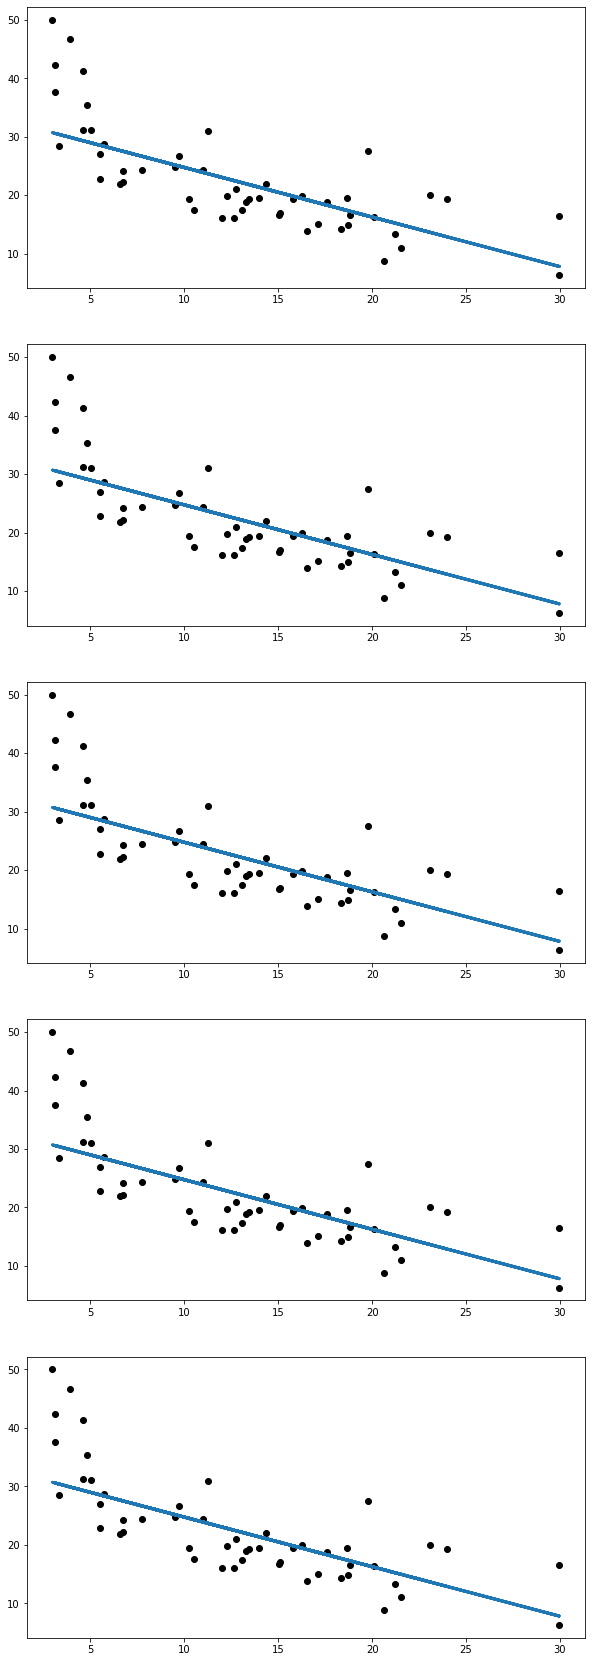

In [96]:
x_train, x_test, y_train, y_test = train_test_split(boston.data[:, np.newaxis, 12], boston.target, test_size=0.1, random_state=4)

alpha_list=[0.001,0.01,0.1,1,5]
for alpha_ in alpha_list:
    ridge = linear_model.Lasso(alpha=alpha_)
    ridge.fit(x_train, y_train)
    y_pred_ = ridge.predict(x_test)
    print(f"Mean squared error (alpha={alpha_}): {mean_squared_error(y_test, y_pred_)}")
    
nrows = 5
ncols = 1
plt.figure(figsize=(10,30))
for i in range(len(alpha_list)):
    plt.subplot( nrows, ncols , i+1 )
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, y_pred_, linewidth=3)
    

In [64]:
x_test.shape,y_pred_.shape 

((51, 13), (51,))